In [ ]:
#work on titanic dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ItVedantPythonAWPClasswork/homes.csv')

In [ ]:
df #output price is depentent on number of variables makes prediction more efficient 

,Area,no_of_rooms,age_house,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
#check null values of dataset
df.isnull().sum()

Area           0
no_of_rooms    1
age_house      0
price          0
dtype: int64

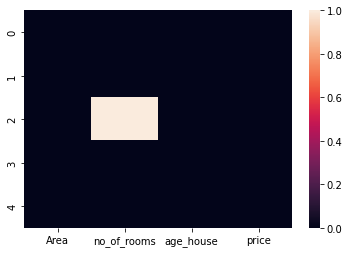

In [ ]:
#visulisation of null 
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#check dtypes of dataset
df.dtypes

Area             int64
no_of_rooms    float64
age_house        int64
price            int64
dtype: object

In [ ]:
#find percentage of  null values
df.isnull().sum()*100/df.shape[0] #if more than 50% delete that column

Area            0.0
no_of_rooms    20.0
age_house       0.0
price           0.0
dtype: float64

In [ ]:
#fill number of rooms with median percentage
m=int(df['no_of_rooms'].median())
df['no_of_rooms'].fillna(m,inplace=True)


In [ ]:
df

,Area,no_of_rooms,age_house,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


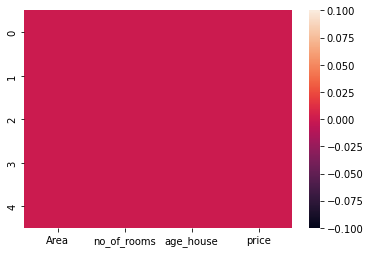

In [ ]:
#visulisation of null 
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#first check  relation between input and output 
#here input: Area, no_of_rooms and age_house
#and output : price which want to predict
#here output is contineous numeric value
df.columns

Index(['Area', 'no_of_rooms', 'age_house', 'price'], dtype='object')

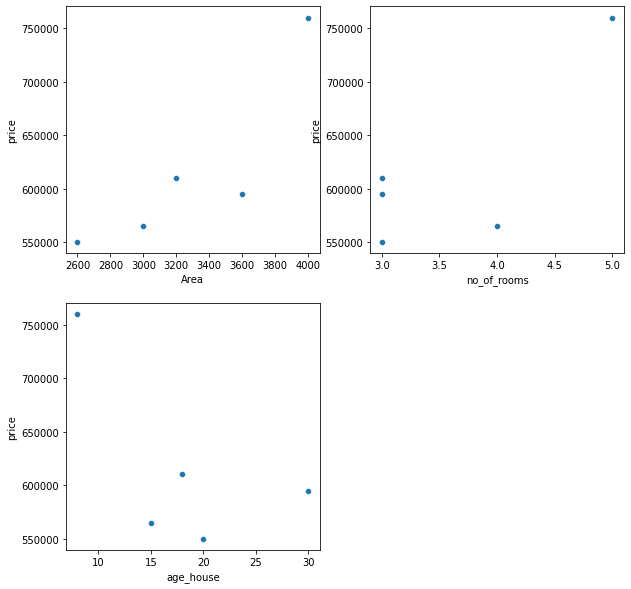

In [ ]:
#input columns list only #list of all input 
columns=['Area', 'no_of_rooms', 'age_house']
plt.figure(figsize=(10,10))
for i,col in enumerate(columns):
  plt.subplot(2,2,i+1)
  sns.scatterplot(data=df,x=col,y='price')
plt.show()

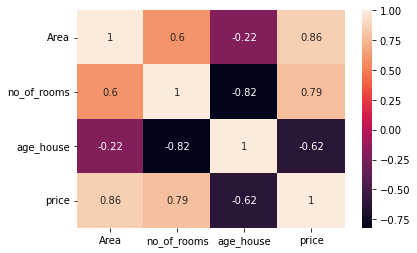

In [ ]:
#check correlation value
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#select input and output from dataset
X=df.drop('price',axis=1) #input
Y=df['price'] #output

In [ ]:
X

,Area,no_of_rooms,age_house
0,2600,3.0,20
1,3000,4.0,15
2,3200,3.0,18
3,3600,3.0,30
4,4000,5.0,8


In [ ]:
Y

0    550000
1    565000
2    610000
3    595000
4    760000
Name: price, dtype: int64

In [ ]:
#Apply standard scaler on input
from sklearn.preprocessing import StandardScaler

In [ ]:
#create an object of StandardScaler class
ss= StandardScaler()
X=ss.fit_transform(X) #convert into numpy array

In [ ]:
print(X)

[[-1.40693001 -0.75        0.25116551]
 [-0.57932412  0.5        -0.44651646]
 [-0.16552118 -0.75       -0.02790728]
 [ 0.66208471 -0.75        1.64652944]
 [ 1.4896906   1.75       -1.42327121]]


In [ ]:
#perform model with the help of linearregression
from sklearn.linear_model import LinearRegression

In [ ]:
#create an object of linearregression class
lr=LinearRegression()

In [ ]:
#Train the model #here we use full dataset 
#use inbuilt method fit() of linearegression 
lr.fit(X,Y)
#y=m1*x1 + m2*x2 + m3*x3 + c #equation for multiple linear regression 

LinearRegression()

In [ ]:
#to check slope/coefficient , use inbuilt method
#coef_ of liearregression class
m=lr.coef_
print(m)
m1,m2,m3=m
print("Slope of Area: ",round(m1,2))
print("Slope of no of rooms : ",round(m2,2))
print("Slope of Age: ",round(m3,2))
#y=m1*x1 + m2*x2 + m3*x3 + c #equation for multiple linear regression 

[ 66335.92239503 -20820.         -48911.97092737]
Slope of Area:  66335.92
Slope of no of rooms :  -20820.0
Slope of Age:  -48911.97


In [ ]:
df.columns

Index(['Area', 'no_of_rooms', 'age_house', 'price'], dtype='object')

In [ ]:
#check intercept , use inbuilt method intercept_
c=lr.intercept_
print("Intercept : ",c)
#y=m1*x1 + m2*x2 + m3*x3 + c #equation for multiple linear regression 

Intercept :  616000.0


In [ ]:
#find price of area= 3300, no_of_rooms=4 and age-rooms=8
#use inbuilt method predict() of Linearregression
lr.predict([[3300,4,8]]) #remember the sequence


array([2.19049968e+08])

In [ ]:
Y_pred=lr.predict([[3300,4,8]])
print("Predicted output:",Y_pred)
for i in Y_pred:
  i=np.round(i,2)
  print("Y_pred:",i)

Predicted output: [2.19049968e+08]
Y_pred: 219049968.14


In [ ]:
# The formula behind  Y_pred

X1=3300 #Area
X2=4 # No_of_rooms
X3=8 # Age_house
Y_pred=m1*X1+m2*X2+m3*X3+c
print(Y_pred)

219049968.13619387
